WHAT YOU NEED TO DO:
Export the well data from Petrel by right-clicking the wells on the input pane, selecting "Export," then choosing "Export as well path/deviation."





Since I am writing this code using google collab,
on google collab, what you need to do is :

create folder : "wells"
and then put the exported files there, as shown on the image below

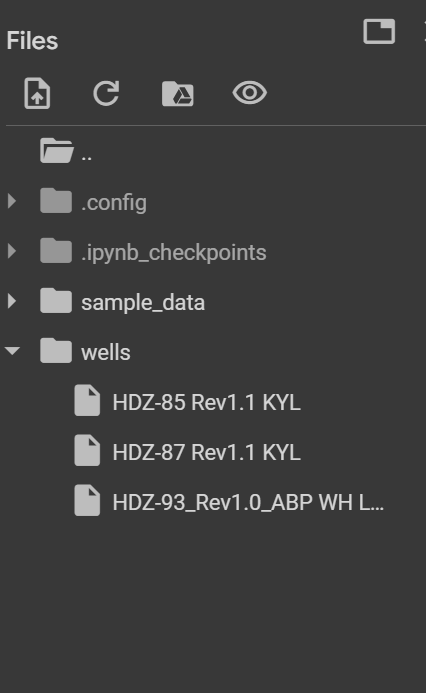


Beside that, you need to convert the surface data as points, and export it in Irap Classic Points(ASCII),
the upload the file on the google colab upload widget

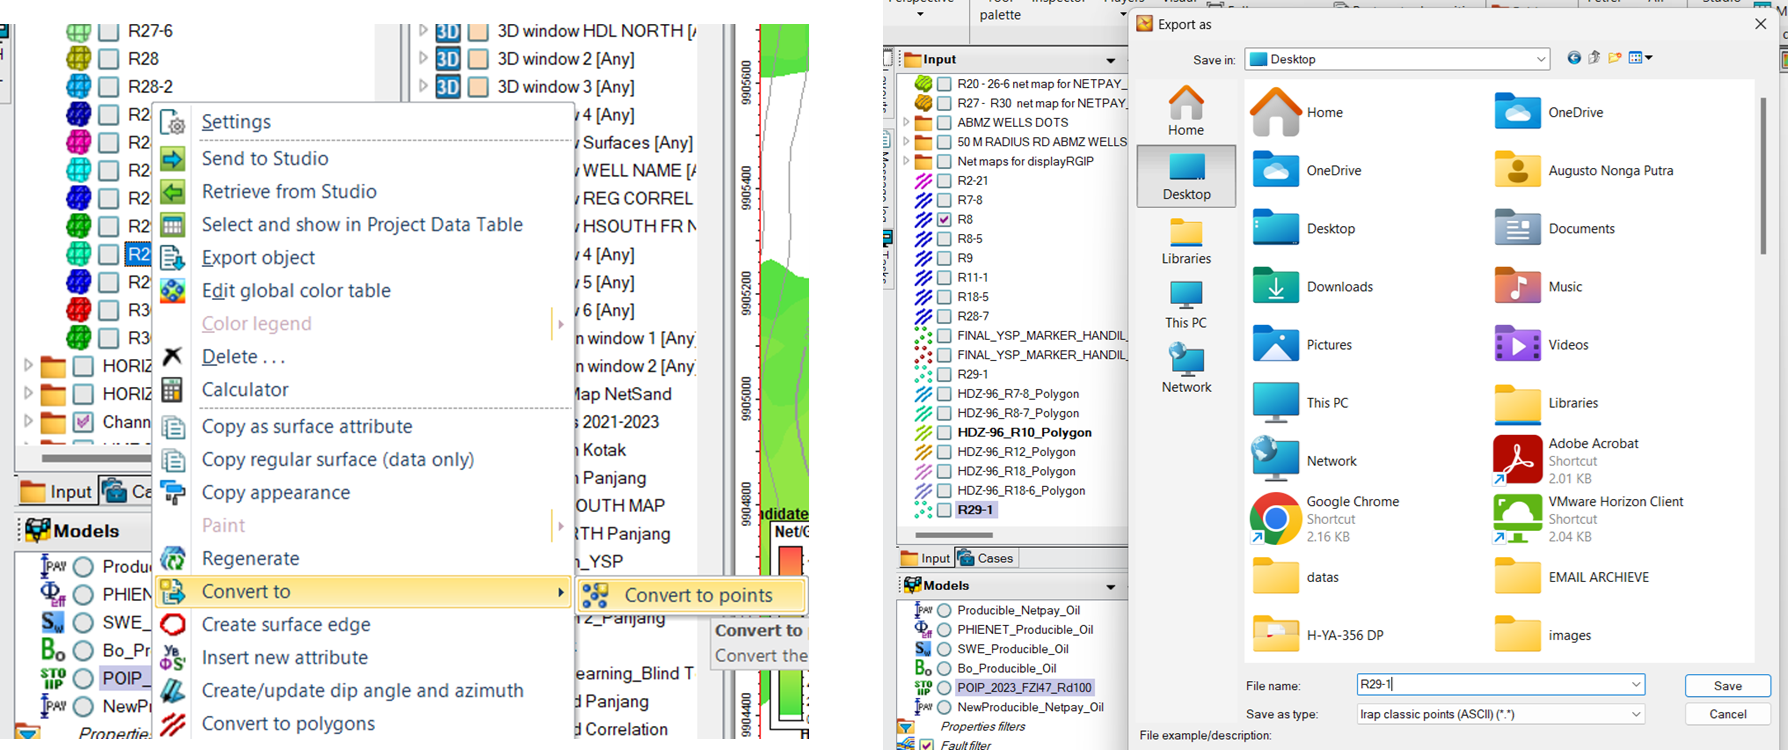

# **DOWNLOADING NECESSARY LIBRARY**

In [4]:
import pandas as pd
!pip install lasio
import lasio
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from scipy.interpolate import griddata

# **PROCESSING DATA AND ITS DIRECTORY**

In [5]:
import os
import csv

input_dir = "/content/wells"  # Store the directory path
output_dir = "/content/csv_folder"  # Store the output directory path
#create output if no folder available
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all files in the folder
input_filenames = os.listdir(input_dir)

for file in input_filenames:

    # Process of turning the files into a CSV
    file_path = os.path.join(input_dir, file)  # Construct the full file path

    # Ignoring .ipynb files
    if os.path.isfile(file_path) and not file.endswith('.ipynb'):  # Edited: Added file type check
        with open(file_path, 'r') as infile:
            lines = infile.readlines()

        # Initialize an empty list to store the data rows
        data = []

        # Extract the data rows excluding header and footer
        try:  # Added: Try block to handle missing separator
            start_index = lines.index('#===============================================================================================================================================\n') + 1
        except ValueError:  # Added: Exception handling for missing separator
            start_index = 0
        end_index = len(lines)  # Edited: Simplified end_index assignment

        for line in lines[start_index:end_index]:
            if line.strip() and not line.startswith('#'):
                row = line.split()
                data.append(row)

        # Write the extracted data into a CSV file with the same filename +csv
        output_filename = file + '.csv' # Edited: Preserve the original filename
        output_filepath = os.path.join(output_dir, output_filename)

        with open(output_filepath, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerows(data)


## CLUSTER DICT

In [6]:
dict_cluster = {0: {0: '"A"',
  1: '"AA"',
  2: '"AB"',
  3: '"B"',
  4: '"BA"',
  5: '"C"',
  6: '"C"',
  7: '"C"',
  8: '"CA"',
  9: '"CB"',
  10: '"CB"',
  11: '"CB"',
  12: '"D"',
  13: '"DA"',
  14: '"E"',
  15: '"EA"',
  16: '"EB"',
  17: '"F"',
  18: '"FA"',
  19: '"G"',
  20: '"GA"',
  21: '"GB"',
  22: '"GC"',
  23: '"GD"',
  24: '"H"',
  25: '"HA"',
  26: '"HB"',
  27: '"HC"',
  28: '"I"',
  29: '"J"',
  30: '"K"',
  31: '"KA"',
  32: '"L"',
  33: '"LA"',
  34: '"LB"',
  35: '"M"',
  36: '"N"',
  37: '"O"',
  38: '"OA"',
  39: '"P"',
  40: '"PA"',
  41: '"Q"',
  42: '"Q"',
  43: '"Q"',
  44: '"QA"',
  45: '"QA"',
  46: '"QA"',
  47: '"R"',
  48: '"RA"',
  49: '"RB"',
  50: '"S"',
  51: '"SA"',
  52: '"T"',
  53: '"TB"',
  54: '"TC"',
  55: '"U"',
  56: '"V"',
  57: '"VB"',
  58: '"VC"',
  59: '"W"',
  60: '"X"',
  61: '"XA"',
  62: '"Y"',
  63: '"YA"',
  64: '"YB"',
  65: '"Z"',
  66: '"ZA"',
  67: '"ZB"'},
 3: {0: 531608.62,
  1: 531189.27,
  2: 531297.52,
  3: 530361.04,
  4: 530392.53,
  5: 529279.64,
  6: 529320.0,
  7: 529339.0,
  8: 529839.62,
  9: 529696.37,
  10: 529715.0,
  11: 529661.0,
  12: 531572.15,
  13: 531320.28,
  14: 530793.01,
  15: 531036.02,
  16: 531021.08,
  17: 531558.11,
  18: 530098.97,
  19: 530718.43,
  20: 530778.35,
  21: 531099.49,
  22: 531248.62,
  23: 531287.44,
  24: 530956.98,
  25: 530771.84,
  26: 530129.91,
  27: 530009.18,
  28: 530563.66,
  29: 531786.91,
  30: 532094.97,
  31: 532187.4,
  32: 529561.28,
  33: 529091.72,
  34: 529098.76,
  35: 530560.41,
  36: 529643.94,
  37: 529236.05,
  38: 529853.74,
  39: 531076.26,
  40: 530789.83,
  41: 530371.07,
  42: 530344.0,
  43: 530361.0,
  44: 530341.16,
  45: 530333.0,
  46: 530334.0,
  47: 531260.77,
  48: 531159.02,
  49: 530790.38,
  50: 531620.61,
  51: 531327.96,
  52: 529743.79,
  53: 529249.66,
  54: 529514.49,
  55: 529683.69,
  56: 531199.4,
  57: 531661.06,
  58: 531385.07,
  59: 529654.6,
  60: 530719.37,
  61: 530832.27,
  62: 529340.98,
  63: 529680.55,
  64: 529392.21,
  65: 532820.52,
  66: 532394.16,
  67: 533147.52},
 4: {0: 9907819.21,
  1: 9907052.65,
  2: 9907407.71,
  3: 9905598.05,
  4: 9905299.39,
  5: 9906293.32,
  6: 9906065.0,
  7: 9905944.0,
  8: 9905860.25,
  9: 9906037.93,
  10: 9906017.0,
  11: 9906070.0,
  12: 9909380.43,
  13: 9909667.93,
  14: 9906282.43,
  15: 9906877.12,
  16: 9906647.92,
  17: 9908352.51,
  18: 9908537.57,
  19: 9905280.62,
  20: 9904802.09,
  21: 9903810.08,
  22: 9904888.76,
  23: 9905091.77,
  24: 9907450.65,
  25: 9907165.72,
  26: 9907398.57,
  27: 9907122.84,
  28: 9904293.08,
  29: 9908952.26,
  30: 9906240.43,
  31: 9906884.13,
  32: 9904868.99,
  33: 9905261.48,
  34: 9904721.3,
  35: 9906715.42,
  36: 9903512.09,
  37: 9907033.92,
  38: 9906861.08,
  39: 9909514.86,
  40: 9910189.6,
  41: 9906016.53,
  42: 9905915.0,
  43: 9906044.0,
  44: 9905815.25,
  45: 9905788.0,
  46: 9905867.0,
  47: 9907877.52,
  48: 9907730.73,
  49: 9907830.09,
  50: 9908792.46,
  51: 9909203.26,
  52: 9908413.23,
  53: 9907737.51,
  54: 9909889.9,
  55: 9902960.39,
  56: 9909988.04,
  57: 9911949.16,
  58: 9910921.15,
  59: 9904213.03,
  60: 9905682.72,
  61: 9906060.52,
  62: 9905730.66,
  63: 9905407.24,
  64: 9905498.79,
  65: 9909537.33,
  66: 9911171.76,
  67: 9908257.8}}

In [7]:
df_cluster = pd.DataFrame(dict_cluster)

# adding well data component into dataframe

In [8]:
#accessing the made dataframe:
group_dict = []
for file in os.listdir(output_dir):
  if file.endswith('.csv'):
    file_path = os.path.join(output_dir, file)
    df = pd.read_csv(file_path)
    name_file = file.split('.csv')[0]

    #assign file name
    displayed_dict = {}
    displayed_dict["Filename"]= name_file

    #accessing column X and Y in df sumur in index 0 and last index for determining cluster
    X = df.iloc[0]["X"]
    Y = df.iloc[0]["Y"]
    Z = df.iloc[0]["Z"]
    X1 = df.iloc[-1]["X"]
    Y1 = df.iloc[-1]["Y"]
    Z1 = df.iloc[-1]["Z"]

    displayed_dict["Cluster"] = None

    #create new col in df_cluster = "DISTANCE TO CLUSTER"
    df_cluster["DISTANCE TO CLUSTER"] = np.sqrt((df_cluster[3]-X)**2 + (df_cluster[4]-Y)**2)

    #choose the min value in distance and assign the 0 column to be in displayed_dict["Cluster"]
    displayed_dict["Cluster"] = df_cluster[df_cluster["DISTANCE TO CLUSTER"] == df_cluster["DISTANCE TO CLUSTER"].min()].iloc[0][0]

    #assigning well head XY
    displayed_dict["X"] = X
    displayed_dict["Y"] = Y

    #assigning departure
    departure = np.sqrt((X1-X)**2 + (Y1-Y)**2 + (Z1-Z)**2)
    displayed_dict["Departure"] = round(departure, 0)

    #assigning DLS
    displayed_dict["highest DLS"] = round(df["DLS"].nlargest(1), 2).tolist()

    #assigning inclination
    displayed_dict["highest Inclination"] = round(df["INCL"].nlargest(1), 2).tolist()

    #appending displayed dict to group dict
    group_dict.append(displayed_dict)

  else:
      pass

# Processing Surface

In [9]:
#PLEASE ENTER SURFACE NAME AS THE NAME OF THE SURFACE FILE
input_surface = "R29-1"

In [10]:
df_surface = pd.read_csv(input_surface)

#create dataframe into list
data = df_surface.values.tolist()

parted = []
surface_list = []

for item in data:
  part = item[0].split()
  parted.append(float(part[0]))
  parted.append(float(part[1]))
  parted.append(-(float((part[2]))))
  surface_list.append(parted)
  parted = []
#change the item in surface list into a tuple

surface_list_tuple = []
for item in surface_list:
  item = tuple(item)
  surface_list_tuple.append(item)

surface_list_tuple = np.array(surface_list_tuple)

In [11]:
#COPY OF ABOVE CODE, JUST DELETE IF ONE IS OKE
from sklearn.neighbors import NearestNeighbors
import re
group_dict = []
for file in os.listdir(output_dir):
  if file.endswith('csv'):
    file_path = os.path.join(output_dir, file)
    df = pd.read_csv(file_path)
    name_file = file.split('csv')[0]

    #assign file name
    displayed_dict = {}
    displayed_dict["Filename"]= re.sub(r'\.$', '', name_file)  #also deleting the dots in the end of filename.

    #accessing column X and Y in df sumur in index 0 and last index for determining cluster
    X = df.iloc[0]["X"]
    Y = df.iloc[0]["Y"]
    Z = df.iloc[0]["Z"]
    X1 = df.iloc[-1]["X"]
    Y1 = df.iloc[-1]["Y"]
    Z1 = df.iloc[-1]["Z"]

    displayed_dict["Cluster"] = None

    #create new col in df_cluster = "DISTANCE TO CLUSTER"
    df_cluster["DISTANCE TO CLUSTER"] = np.sqrt((df_cluster[3]-X)**2 + (df_cluster[4]-Y)**2)

    #choose the min value in distance and assign the 0 column to be in displayed_dict["Cluster"]
    displayed_dict["Cluster"] = df_cluster[df_cluster["DISTANCE TO CLUSTER"] == df_cluster["DISTANCE TO CLUSTER"].min()].iloc[0][0]

    #assigning well head XY
    displayed_dict["X"] = X
    displayed_dict["Y"] = Y

    #assigning departure
    departure = np.sqrt((X1-X)**2 + (Y1-Y)**2 + (Z1-Z)**2)
    displayed_dict["Departure"] = round(departure, 0)

    #assigning DLS
    displayed_dict["highest DLS"] = round(df["DLS"].nlargest(1), 2).tolist()

    #assigning inclination
    displayed_dict["highest Inclination"] = round(df["INCL"].nlargest(1), 2).tolist()







    #take column xyz in df
    df_xyz = df[["X", "Y", "Z"]]

    tuple_df_xyz = df_xyz.values.tolist()
    tuple_well = []
    for item in tuple_df_xyz:
      item = tuple(item)
      tuple_well.append(item)

    tuple_well = np.array(tuple_well)

    #lakukan KNN
    k = 1
    nn = NearestNeighbors(n_neighbors=k, algorithm = 'auto')

    #fit model with the data
    nn.fit(surface_list_tuple)

    #find nearest neighbours
    distances, indices = nn.kneighbors(tuple_well)

    #take nearest neighbors
    min_distance_index = np.argmin(distances)
    nearest_neighbour = surface_list_tuple[indices[min_distance_index]]

    '''for item in nearest_neighbour:
      for value in item:
        #INTO NON SCIENTIFIC FORMAT
        value = round(value, 2)
        displayed_dict["R29-1 COOR"] = value'''

    #create nested dict
    displayed_dict["R29-1 COORDINATE"] = []
    for item in nearest_neighbour:
      displayed_dict["R29-1 COORDINATE"].append([round(value,2) for value in item])


    #appending displayed dict to group dict
    group_dict.append(displayed_dict)

  else:
      pass

In [12]:

group_dict
list_df = []
for item in group_dict:
  #make a dframe
  df = pd.DataFrame(item)
  list_df.append(df)

#merge all df in the list
df = pd.concat(list_df).reset_index(drop=True)
# add delete " " and add -H di df["Cluster"]
df["Cluster"] = df["Cluster"].str.replace('"', '')
#add "H-" before the character
df["Cluster"] = "H-" + df["Cluster"]



In [13]:
group_dict

[{'Filename': 'HDZ-85 Rev1.1 KYL',
  'Cluster': '"D"',
  'X': 531562.0,
  'Y': 9909393.0,
  'Departure': 4083.0,
  'highest DLS': [2.5],
  'highest Inclination': [59.9],
  'R29-1 COORDINATE': [[532680.84, 9911609.07, -3178.75]]},
 {'Filename': 'HDZ-93_Rev1.0_ABP WH LOC',
  'Cluster': '"D"',
  'X': 531562.0,
  'Y': 9909393.0,
  'Departure': 3128.0,
  'highest DLS': [3.01],
  'highest Inclination': [50.5],
  'R29-1 COORDINATE': [[532080.84, 9909059.07, -2987.53]]},
 {'Filename': 'HDZ-87 Rev1.1 KYL',
  'Cluster': '"RA"',
  'X': 531158.0,
  'Y': 9907729.0,
  'Departure': 3177.0,
  'highest DLS': [2.5],
  'highest Inclination': [51.5],
  'R29-1 COORDINATE': [[531530.84, 9906659.07, -2935.91]]}]

# **DISPLAYING THE DATAFRAME RESULT**

In [14]:
df

,Filename,Cluster,X,Y,Departure,highest DLS,highest Inclination,R29-1 COORDINATE
0,HDZ-85 Rev1.1 KYL,H-D,531562.0,9909393.0,4083.0,2.50,59.9,"[532680.84, 9911609.07, -3178.75]"
1,HDZ-93_Rev1.0_ABP WH LOC,H-D,531562.0,9909393.0,3128.0,3.01,50.5,"[532080.84, 9909059.07, -2987.53]"
2,HDZ-87 Rev1.1 KYL,H-RA,531158.0,9907729.0,3177.0,2.50,51.5,"[531530.84, 9906659.07, -2935.91]"


**GENERATING SURFACE AND DISPLAY**

[‎7/‎9/‎2024 2:27 PM] Muhammad Irsyad Hibatullah:
or every depth sample --> gaperlu for every depth sample sih. tapi setidaknya di range interval yg lo udh bisa set
[‎7/‎9/‎2024 2:28 PM] Augusto-Nonga PUTRA:
paling enak,
lo KNN dulu surface nya
KDTree --> Ini pas tahap interpolasoi si surfacenya syad? atau pas proses intersecting well ke surface?
[‎7/‎9/‎2024 2:30 PM] Muhammad Irsyad Hibatullah:
pas tahap intersecting
bahkan, lo gaperlu interpolate
masukin aja xyz raw nya
kecuali lo mau nge display as 2D heatmap, baru deh lo interpolasi
[‎7/‎9/‎2024 2:31 PM] Muhammad Irsyad Hibatullah:
https://stackoverflow.com/questions/48126771/nearest-neighbour-search-kdtree
jadi pas lo nge run. dia bakal nge return index closest point dari xyz surface lo. dan return distance nya jg
nah, for every depth sample
lo run aja tuh semuanya
[‎7/‎9/‎2024 2:32 PM] Muhammad Irsyad Hibatullah:
abis itu tinggal pilih mana yg distance nya paling dikit
dari setiap depth sample
[‎7/‎9/‎2024 2:37 PM] Augusto-Nonga PUTRA:
ok gw coba, thanks bgt syad, nice info


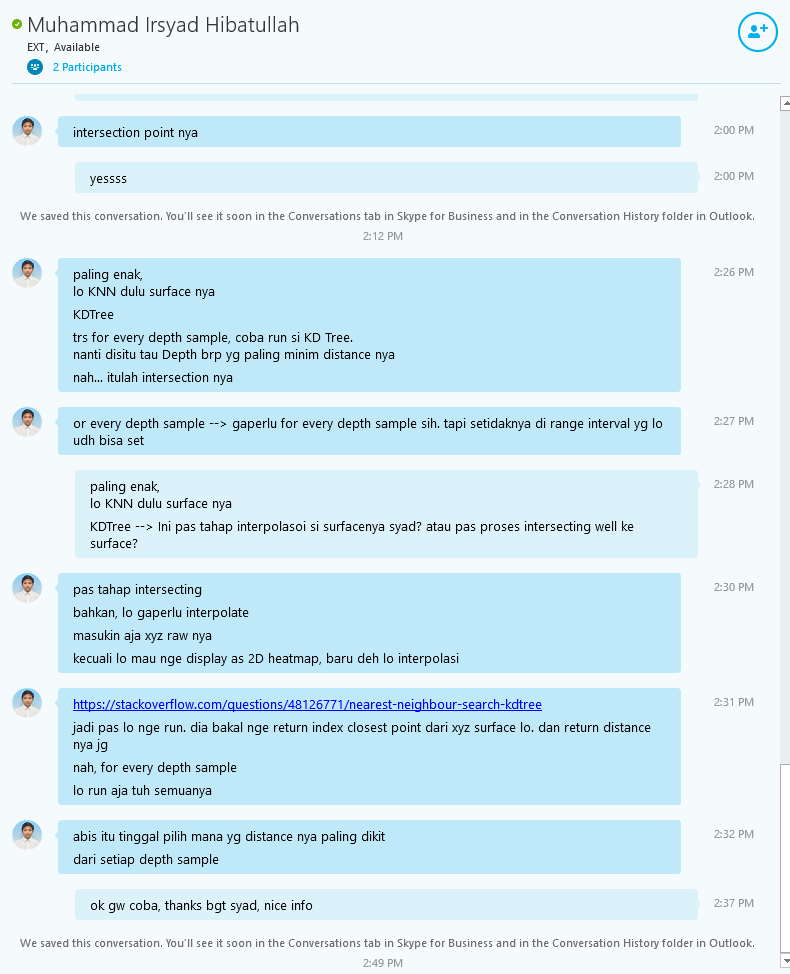

In [3]:
#process intersevting trajectory with KDE
#https://stackoverflow.com/questions/48126771/nearest-neighbour-search-kdtree
import numpy as py
